In [15]:
config_file = '../configs/deepent_fuse_rcnn_R_50_FPN.yaml'
threshold = 0.5
model = '../output/temp/model_0004999.pth'
samples = 1
dataset = 'CPT2a-n_train'
type_ = 'many'
opts = []

class Args:
    def __init__(self, conf, tr, mod, sam, ty, opt, dts):
        self.config_file = conf
        self.threshold = tr
        self.model = mod
        self.samples = sam
        self.dataset = dts
        self.type = ty
        self.opts = []
        self.output = None
        
args = Args(config_file, threshold, model, samples, type_, opts, dataset)

In [16]:
from detectron2.config import get_cfg
from detectron2.engine import default_setup
from deepent.config import add_deepent_config

cfg = get_cfg()
add_deepent_config(cfg)
cfg.merge_from_file(config_file)
cfg.merge_from_list(opts)
cfg.MODEL.WEIGHTS = model 
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = threshold 
cfg.freeze()
default_setup(cfg, args)

[04/04 00:36:27 detectron2]: Rank of current process: 0. World size: 1
[04/04 00:36:27 detectron2]: Environment info:
------------------------  --------------------------------------------------------------------------------------
sys.platform              linux
Python                    3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) [GCC 7.2.0]
numpy                     1.15.4
detectron2                0.1.1 @/home/ubuntu/drone-tree-id/lib/detectron2/detectron2
detectron2 compiler       GCC 5.4
detectron2 CUDA compiler  10.1
detectron2 arch flags     sm_75
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.4.0 @/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch
PyTorch debug build       False
CUDA available            True
GPU 0                     Tesla T4
CUDA_HOME                 /usr/local/cuda-10.1
NVCC                      Cuda compilation tools, release 10.1, V10.1.243
Pillow                    5.4.1
torchvision               0.5.0 @

[04/04 00:36:27 detectron2]: Full config saved to ./output/config.yaml


In [17]:
from detectron2.data import MetadataCatalog, DatasetCatalog
from deepent.data.register_datasets import register_datasets

register_datasets(f'/home/ubuntu/RGBD-Training-Data/')

Registering Kelowna_train


AssertionError: Dataset 'Kelowna_train' is already registered!

In [18]:
from tools.predictor import RGBDPredictor
predictor = RGBDPredictor(cfg)

[04/04 00:36:30 fvcore.common.checkpoint]: Loading checkpoint from ../output/temp/model_0004999.pth


In [19]:
data = list(DatasetCatalog.get("CPT2a-n_test"))
metadata = MetadataCatalog.get("CPT2a-n_test")

In [20]:
data[0]

{'file_name': '/home/ubuntu/RGBD-Training-Data/test/CPT2a-n/tile_0.png',
 'image_id': 241,
 'width': 640,
 'height': 640,
 'annotations': [{'bbox': [302.6964052893363,
    189.20581114968786,
    433.0745017691279,
    333.55298939517115],
   'segmentation': [[358.57273235210414,
     189.20581114968786,
     400.47997764918,
     221.80033526963575,
     395.823617060616,
     263.7075805667114,
     405.136338237744,
     277.67666233240334,
     381.85453529492406,
     277.67666233240334,
     381.85453529492406,
     310.27118645235123,
     409.79269882630797,
     300.95846527522326,
     405.136338237744,
     277.67666233240334,
     419.10542000343594,
     291.6457440980953,
     433.0745017691279,
     291.6457440980953,
     423.7617805919999,
     310.27118645235123,
     423.7617805919999,
     333.55298939517115,
     377.1981747063601,
     328.89662880660717,
     377.1981747063601,
     310.27118645235123,
     358.57273235210414,
     305.61482586378725,
     349.26

In [40]:
import cv2
img = cv2.imread(data[0]['file_name'],cv2.IMREAD_UNCHANGED)

In [41]:
rgb = img[:,:,0:3]
rgb.shape

(640, 640, 3)

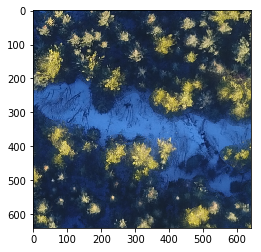

In [42]:
from matplotlib import pyplot as plt
plt.imshow(rgb)

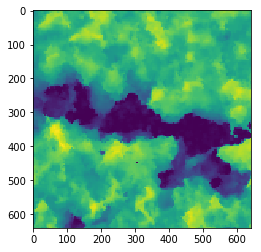

In [43]:
chm = img[:,:,-1]
plt.imshow(chm)

In [44]:
chm.shape

(640, 640)

In [11]:
predictions = predictor(img)

Python 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
Type 'copyright', 'credits' or 'license' for more information
IPython 6.4.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: x
Out[1]: 
tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0511e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 6.8730e-01,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 1.5456e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 1.8565e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.0688e-02,
           5.5988e-01, 5.1902e+00]],

         [[8.5959e-01, 1.2379e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 2.4396e-01],
          [3.6655e-01, 4.4347e-01, 0.0000e+00,  ..., 0.0000e+0


In [8]: y = depth_encoder_features[d_name]

In [9]: y
Out[9]: 
tensor([[[[0.4719, 0.7861, 0.9624,  ..., 0.2955, 0.1290, 0.2605],
          [0.2713, 1.2377, 1.4459,  ..., 0.2670, 0.0748, 0.6952],
          [0.4165, 1.2290, 1.2938,  ..., 0.3302, 0.0863, 0.4349],
          ...,
          [0.0000, 0.3839, 0.3788,  ..., 0.1197, 0.1440, 0.8068],
          [0.0511, 0.4390, 0.4238,  ..., 0.0000, 0.0000, 0.5684],
          [0.5667, 1.2097, 0.7654,  ..., 0.6930, 0.8105, 1.1090]],

         [[0.0384, 0.3821, 0.2274,  ..., 2.0038, 1.8240, 1.2125],
          [0.1225, 0.1480, 0.1431,  ..., 1.8998, 1.8042, 0.6960],
          [0.3352, 0.2438, 0.2213,  ..., 1.3686, 1.3539, 0.8870],
          ...,
          [1.2652, 1.8114, 1.4834,  ..., 2.0146, 2.5081, 1.6737],
          [0.9489, 1.2909, 1.1291,  ..., 2.1317, 2.4008, 1.4619],
          [0.4364, 0.6875, 0.7748,  ..., 1.1362, 1.5220, 0.4516]],

         [[0.5257, 0.1886, 1.1109,  ..., 0.1566, 0.1450, 0.1239],
          [0.3949, 0.2988, 1.9014,  ..., 0.0


In [3]: outputs
Out[3]: 
{'res2': tensor([[[[0.4719, 0.7861, 0.9624,  ..., 0.2955, 0.1290, 0.2605],
           [0.2713, 1.2377, 1.4459,  ..., 1.3182, 0.0748, 0.6952],
           [0.4165, 1.2290, 1.2938,  ..., 1.0175, 0.0863, 0.4349],
           ...,
           [0.0000, 0.3839, 0.3788,  ..., 0.1197, 0.1440, 2.3524],
           [0.0511, 0.4390, 0.4238,  ..., 0.0000, 0.0000, 2.4249],
           [0.5667, 1.2097, 0.7654,  ..., 0.7237, 1.3704, 6.2992]],
 
          [[0.8980, 1.6200, 0.2274,  ..., 2.0038, 1.8240, 1.4564],
           [0.4891, 0.5914, 0.1431,  ..., 1.8998, 1.8042, 0.6960],
           [0.9113, 1.6192, 1.2636,  ..., 1.3686, 1.3539, 1.0269],
           ...,
           [1.2652, 1.8114, 1.4834,  ..., 2.0146, 2.6029, 1.6737],
           [0.9489, 1.2909, 1.1291,  ..., 2.1317, 3.3903, 1.4619],
           [2.6224, 1.7700, 2.0122,  ..., 1.1362, 2.4660, 3.1725]],
 
          [[1.1226, 1.9032, 2.4283,  ..., 0.4197, 0.2060, 0.4510],
           [0.8532, 1.1504, 3.6792,  ..., 0.0717, 0.5891,


In [4]: exit



In [12]:
dir(predictor)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cfg',
 'input_format',
 'metadata',
 'model',
 'transform_gen']

In [13]:
dir(predictor.model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_parameters',
 '_postprocess',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_module',
 'apply',
 'backbone',
 'buffers',
 'children',
 'cpu',
 'cuda',
 'device',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'float',
 'forward',
 'half',
 'inferen

In [14]:
predictor.model.parameters

<bound method Module.parameters of GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): FusedResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (depth_e